In [1]:
%pylab inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Populating the interactive namespace from numpy and matplotlib


## Przygotowanie środowiska

```
    python -m venv fuzzy
    source fuzzy/bin/activate
    pip install -r requirements.txt
    jupyter-notebook
```

# Rozmyty podatek dochodowy

Poniższy model jest propozycją podatku dochodowego dla działalności gospodarczych. Głównym zadaniem podmiotów rządowych powinno być zagwarantowanie osobom pracującym godnych warunków pracy oraz pewnej emerytury. Ostatnia sytuacja, związana z pandemią COVID-19 obnażyła słabość kapitalizmu, w efekcie czego dużo ludzi straciło pracę z dnia na dzień a rząd został z problemem, który zamiatał długo pod dywan. W dobie kapitalizmu dużym korporacjom nie zależy na polepszeniu warunków zaturdnienia, często oferująć umowy śmieciowe pracownikom fizycznym. W walce z tym zjawiskiem powienien przyjść **rozmyty podatek dochodowy**. Obliczany on będzie na podstawie nie tylko wysokości dochodów, ale też warunków na jakich zatrudniani są pracownicy. Wraz ze wzrostem dysproporcji społecznej, przedsiębiorstwo będzie zobligowane do opłacenia wyższego podatku, tak aby rząd mógł przeznaczyć te pieniądze na np. dofinansowanie służby zdrowia czy zapewnieniu minimalnej emerytury, pozwalającej na przeżycie w dobie inflacji. Poniższa propozycja jest daleka od ideału, ale porusza wiele czynników, które moim zdaniem powinny być brane pod uwagę, tak aby w przyszłości zapewnić wyższą kulturę pracy oraz sprawiedliwą konkurencję. Jeżeli przedsiębiorstwo generuje wysokie przychody, jednak nie partycypują w tym pracownicy, wtedy ten podatek powinien zadziałać jako sprzężenie zwrotne, aby zapobiec patologiom ekonomicznym XXI w. 

Podstawowym kryterium, jakim będzie klasyfikowana placówka będzie liczba pracowników.

/home/mqqlecule/Documents/fuzzy/fuzzy/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


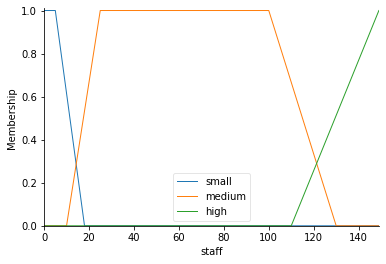

In [2]:
staff = ctrl.Antecedent(np.arange(0, 150, 1), 'staff')

staff['small'] = fuzz.trapmf(staff.universe, [0, 0, 5, 18])
staff['medium'] = fuzz.trapmf(staff.universe, [10, 25, 100, 130])
staff['high'] = fuzz.trimf(staff.universe, [110, staff.universe[-1], staff.universe[-1]])
staff.view()

Kolejnym bradzo ważnym krytermium będzie odsetek umów o pracę wśród pracowników

/home/mqqlecule/Documents/fuzzy/fuzzy/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


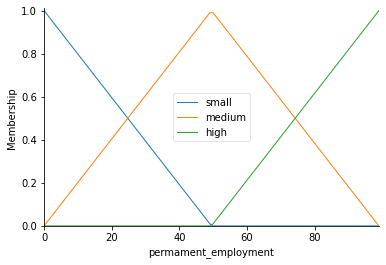

In [3]:
permament_employment = ctrl.Antecedent(np.arange(0, 1e2, 1), 'permament_employment')

names = ['small', 'medium', 'high']
permament_employment.automf(names=names)
permament_employment.view()

Ważnym czynnikiem będzie wysokość generowanego przychodu

/home/mqqlecule/Documents/fuzzy/fuzzy/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


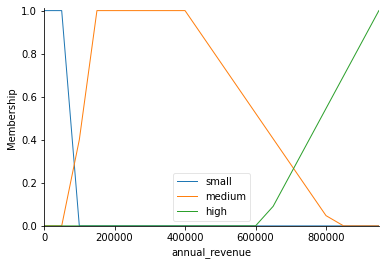

In [4]:
annual_revenue = ctrl.Antecedent(np.arange(0, 1e6, 5e4), 'annual_revenue')

annual_revenue['small'] = fuzz.trapmf(annual_revenue.universe, [0, 0, 8e4, 1e5])
annual_revenue['medium'] = fuzz.trapmf(annual_revenue.universe, [8e4, 13e4, 40e4, 82e4])
annual_revenue['high'] = fuzz.trimf(annual_revenue.universe, [62e4, annual_revenue.universe[-1], annual_revenue.universe[-1]])

annual_revenue.view()

Kolejnym kryterium, które jest często pomijane to stosunek średniej płacy w zarządzie firmy do płacy pracowników. Jeżeli istnieją duże dysproporcje, to wtedy ten podatek powinien w jakiś sposób wymusić więszą partycypacje pracowników w dochodach firmy. Argumentując faktem, że są motorem napędowym firmy.

/home/mqqlecule/Documents/fuzzy/fuzzy/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


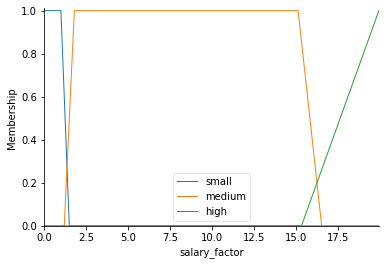

In [5]:
salary_factor = ctrl.Antecedent(np.arange(0, 20, 0.1), 'salary_factor')

salary_factor['small'] = fuzz.trapmf(salary_factor.universe, [0, 0, 1, 1.5])
salary_factor['medium'] = fuzz.trapmf(salary_factor.universe, [1.2, 1.8, 15.1, 16.5])
salary_factor['high'] = fuzz.trimf(salary_factor.universe, [15.3, salary_factor.universe[-1], salary_factor.universe[-1]])

salary_factor.view()

Podatek rozmyty powinien też brać pod uwagę jak dużo ludzi młodych może rozpocząć prace w danym miejscu. Takie miejsca pracy powinny być chronione, w celu ułatwieniu młodziezy zalezieniu pierwszej pracy.

/home/mqqlecule/Documents/fuzzy/fuzzy/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


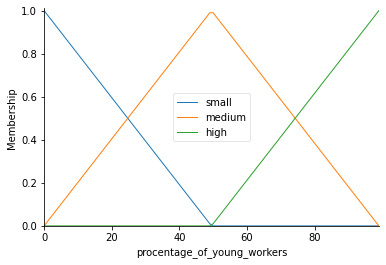

In [6]:
procentage_of_young_workers = ctrl.Antecedent(np.arange(0, 100, 1), 'procentage_of_young_workers')
procentage_of_young_workers.automf(names=names)
procentage_of_young_workers.view()

Podobna sytuacja co wyżej tyczy się osób starszych, aby umożliwić dorobienie do emerytury w miejscach, gdzie jeszcze mogą wykonywać sprawnie pracę

/home/mqqlecule/Documents/fuzzy/fuzzy/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


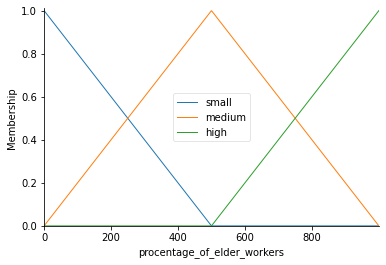

In [7]:
procentage_of_elder_workers = ctrl.Antecedent(np.arange(0, 1000, 1), 'procentage_of_elder_workers')
procentage_of_elder_workers.automf(names=names)
procentage_of_elder_workers.view()

Podatek będzie oscylował od 5% do nawet 60%. Podzielony zostanie na 4 grupy - niski, średni, wysoki oraz podatek od luksusu. Ten ostatni ma szczególnie chronić sytuację gospodarczą przed skrajnym wyzyskiem pracowników przez pracodawców.

/home/mqqlecule/Documents/fuzzy/fuzzy/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


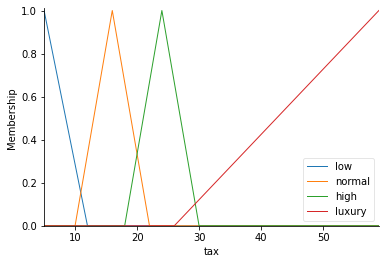

In [8]:
tax = ctrl.Consequent(np.arange(5, 60, 1), 'tax')

tax['low'] = fuzz.trimf(tax.universe, [5, 5, 12])
tax['normal'] = fuzz.trimf(tax.universe, [10, 16, 22])
tax['high'] = fuzz.trimf(tax.universe, [18, 24, 30])
tax['luxury'] = fuzz.trimf(tax.universe, [26, tax.universe[-1], tax.universe[-1]])

tax.view()

Poniższe reguły mają być orędownikami sprawiedliwości społęcznej:

In [9]:
rules = []

rule = ctrl.Rule(staff['high'] & (permament_employment['small'] | permament_employment['medium']) & annual_revenue['high'] & salary_factor['high'], tax['luxury'])

rules.append(rule)

Jeżeli firma generuje dużo przychodu, przy niesprawiedliwym traktowaniu pracowników powinno zostać sklasyfikowana do grupy o podwyższonym podatku dochodowym.

In [10]:
rule = ctrl.Rule(staff['small'] & annual_revenue['small'] & salary_factor['small'], tax['low'])

rules.append(rule)

W przypadku małych przedsiębiorstw, powinny zostać one objęte niższym podatkiem. Tak, aby umożliwić im rozwój oraz tymczasowy byt materialny dla właścicieli. Tak, aby nie musieli co miesiąc żegnać się z całym utargiem.

In [11]:
rule = ctrl.Rule(procentage_of_young_workers['medium'] | procentage_of_young_workers['high'], tax['low'])

rules.append(rule)  

rule = ctrl.Rule(procentage_of_elder_workers['medium'] | procentage_of_elder_workers['high'], tax['low'])

rules.append(rule)  

W przypadku miejsc pracy, w których pracuje większy odsetek osób uczących się/emerytów, przysługuje im ulga podatkowa.

In [12]:
rule = ctrl.Rule(staff['high'] & annual_revenue['high'] & salary_factor['medium'], tax['high'])

rules.append(rule)

Dla rozwinietych firm, które dobrze prosperują podatek powinien być utrzymany na wysokim poziomie.

In [13]:
rule = ctrl.Rule(staff['medium'], tax['normal'])
rules.append(rule)
rule = ctrl.Rule(staff['high'], tax['high'])
rules.append(rule)
rule = ctrl.Rule(staff['small'], tax['low'])
rules.append(rule)

In [14]:
rule = ctrl.Rule(salary_factor['small'], tax['low'])
rules.append(rule)
rule = ctrl.Rule(salary_factor['medium'], tax['normal'])
rules.append(rule)
rule = ctrl.Rule(salary_factor['high'], tax['high'])
rules.append(rule)

In [15]:
rule = ctrl.Rule(permament_employment['small'], tax['high'])
rules.append(rule)
rule = ctrl.Rule(permament_employment['medium'], tax['normal'])
rules.append(rule)
rule = ctrl.Rule(permament_employment['high'], tax['low'])
rules.append(rule)

In [16]:
rule = ctrl.Rule(staff['medium'] & permament_employment['high'] & annual_revenue['high'] & salary_factor['small'], tax['low'])

rules.append(rule)

In [17]:
income_tax_ctrl = ctrl.ControlSystem(rules)
income = ctrl.ControlSystemSimulation(income_tax_ctrl)

Przykład firmy, która generuje duże przychody. Jednak stosunek zarobków wśród zarządu względem pracowników jest zachwiany, stąd wysoki podatek ~30%

30.567839242093903


/home/mqqlecule/Documents/fuzzy/fuzzy/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


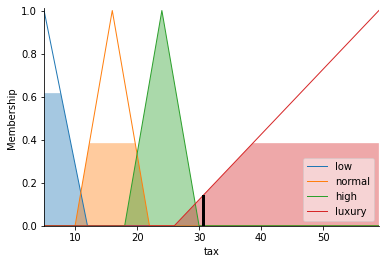

In [18]:
income.input['staff'] = 400
income.input['permament_employment'] = 80
income.input['annual_revenue'] = 1e7
income.input['salary_factor'] = 40
income.input['procentage_of_young_workers'] = 10
income.input['procentage_of_elder_workers'] = 2

income.compute()

print(income.output['tax'])
tax.view(sim=income)

Przykład firmy, która generuje duże przychody. Jednak stosunek zarobków wśród zarządu względem pracowników jest zachwiany oraz dodatkowo jest niski odsetek pracowników zaturdnionych na umowie o pracę stąd wysoki podatek ~36%

36.600095036493414


/home/mqqlecule/Documents/fuzzy/fuzzy/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


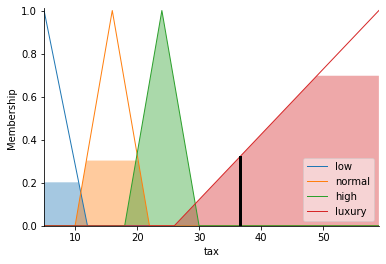

In [19]:
income.input['staff'] = 300
income.input['permament_employment'] = 15
income.input['annual_revenue'] = 1e7
income.input['salary_factor'] = 100
income.input['procentage_of_young_workers'] = 10
income.input['procentage_of_elder_workers'] = 2

income.compute()

print(income.output['tax'])
tax.view(sim=income)

Natomiast w przypadku średniej firmy, która dalej się rozwija i ma dość wysoki odsetek osób na umowie o pracę podatek wynosi ~14%

13.821842723132686


/home/mqqlecule/Documents/fuzzy/fuzzy/lib/python3.7/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


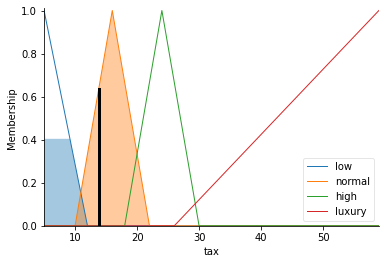

In [20]:
income.input['staff'] = 15
income.input['permament_employment'] = 50
income.input['annual_revenue'] = 5e5
income.input['salary_factor'] = 2
income.input['procentage_of_young_workers'] = 20
income.input['procentage_of_elder_workers'] = 2

income.compute()

print(income.output['tax'])
tax.view(sim=income)